# Intel Image Classification Using CNNs

### Steps:
* Load and preprocess the dataset.
* Build a Convolutional Neural Network (CNN).
* Train and evaluate the model.
* Deploy the model as a web application.
* Tools & Libraries: Python, TensorFlow/Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os   

In [11]:
data_dir = "data2"

train_dir = os.path.join(data_dir, 'seg_train')
test_dir = os.path.join(data_dir, 'seg_test')


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical')
test_data = train_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical')
 

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Build the CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax') # 6 classes in the dataset
])

# compile the model 
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()
model 

c:\Users\mubin\OneDrive\Desktop\WorkSpace\image_classificaton_Tenserflow\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Train the model
history = model.fit(train_data,
                    epochs = 10,
                    validation_data=test_data)
#save the model 
model.save('intel_image_classifier.h5')

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 1122s 3s/step - accuracy: 0.4544 - loss: 1.3461 - val_accuracy: 0.6287 - val_loss: 0.9438
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 689s 2s/step - accuracy: 0.6233 - loss: 0.9926 - val_accuracy: 0.6813 - val_loss: 0.8703
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 562s 1s/step - accuracy: 0.6748 - loss: 0.8749 - val_accuracy: 0.7263 - val_loss: 0.7476
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 587s 1s/step - accuracy: 0.7072 - loss: 0.7894 - val_accuracy: 0.7583 - val_loss: 0.6848
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 689s 2s/step - accuracy: 0.7356 - loss: 0.7317 - val_accuracy: 0.7663 - val_loss: 0.6351
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 750s 2s/step - accuracy: 0.7556 - loss: 0.6907 - val_accuracy: 0.7790 - val_loss: 0.6017
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.7636 - loss: 0.6577 - val_accuracy: 0.8013 - val_loss: 0.5455
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.7724 - loss: 0.6364 - val_acc

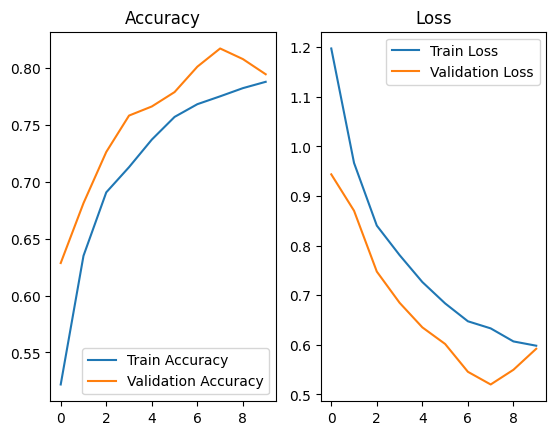

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [31]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc*100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 43s 456ms/step - accuracy: 0.8080 - loss: 0.5353
Test Accuracy: 80.17%


In [39]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np 

def perdict_image(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img_arr = img_to_array(img)/255.0
    img_arr = np.expand_dims(img_arr, axis=0)
    prediction = model.predict(img_arr)
    class_names = list(train_data.class_indices.keys())
    return class_names[np.argmax(prediction)]

image_path = "data2/seg_test/mountain/20085.jpg"
print(f"Predicted class: {perdict_image(image_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted class: mountain


In [ ]:
def plot_predictions(image_paths):
    plt.figure(figsize=(12, 8))
    for i, image_path in enumerate(image_paths):
        # Load and preprocess the image
        img = load_img(image_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        class_names = list(train_data.class_indices.keys())

        
        # Predict the class
        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        
        # Plot the image
        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(f"Pred: {predicted_class}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Test with multiple images
image_paths = [
    "data2/seg_test/glacier/20111.jpg",
    "data2/seg_test/forest/24324.jpg",
    "data2/seg_test/buildings/20206.jpg",
    "data2/seg_test/sea/20167.jpg",
    "glacier.jpg",
    "build.jpg"
    "forest.jpg"
]
plot_predictions(image_paths)
